In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys
sys.path.insert(0, '../src')

## 3. Modeling - Random Forest

**[3.1.1]** Import the pandas, numpy, and dump package

In [21]:
import pandas as pd
import numpy as np
from joblib import dump

### 3.1 Load and Explore Dataset

In [22]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_val = pd.read_csv('../data/processed/y_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

In [23]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### 3.2 Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Fit the model without hyperparameter tuning.

In [25]:
random_forest = RandomForestClassifier(random_state=8)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [26]:
from models.predict_model import Modeling

In [27]:
modeling = Modeling(random_forest, X_train, X_val, y_train, y_val, X_test)

                roc-auc score  accuracy score  precision score  recall score   
Training Set         1.000000        1.000000         1.000000      1.000000  \
Validation Set       0.999986        0.997061         0.994355      0.999797   

                f1 score  
Training Set    1.000000  
Validation Set  0.997069  


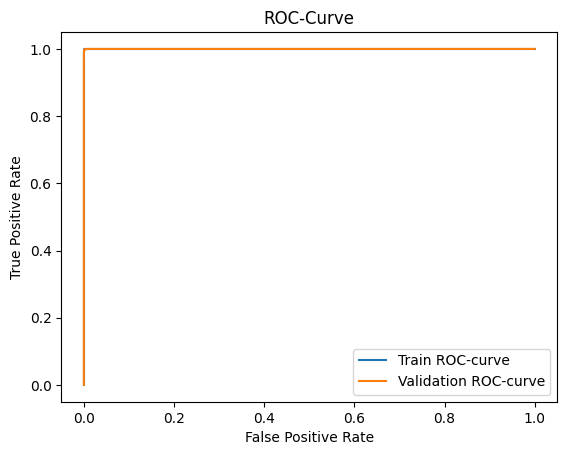

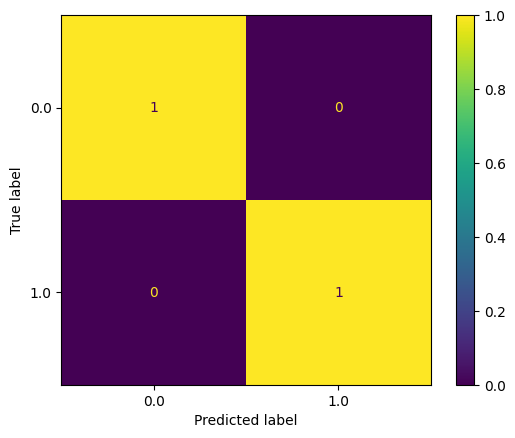

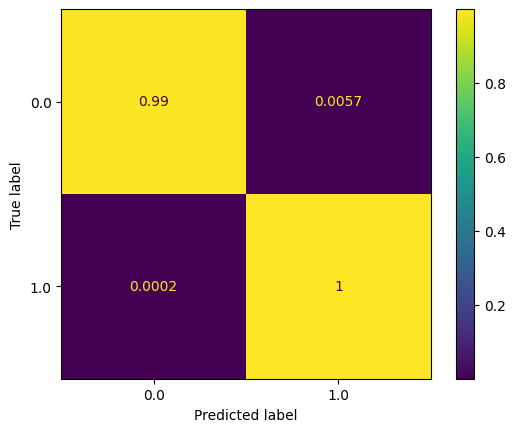

In [28]:
modeling.predict_model()

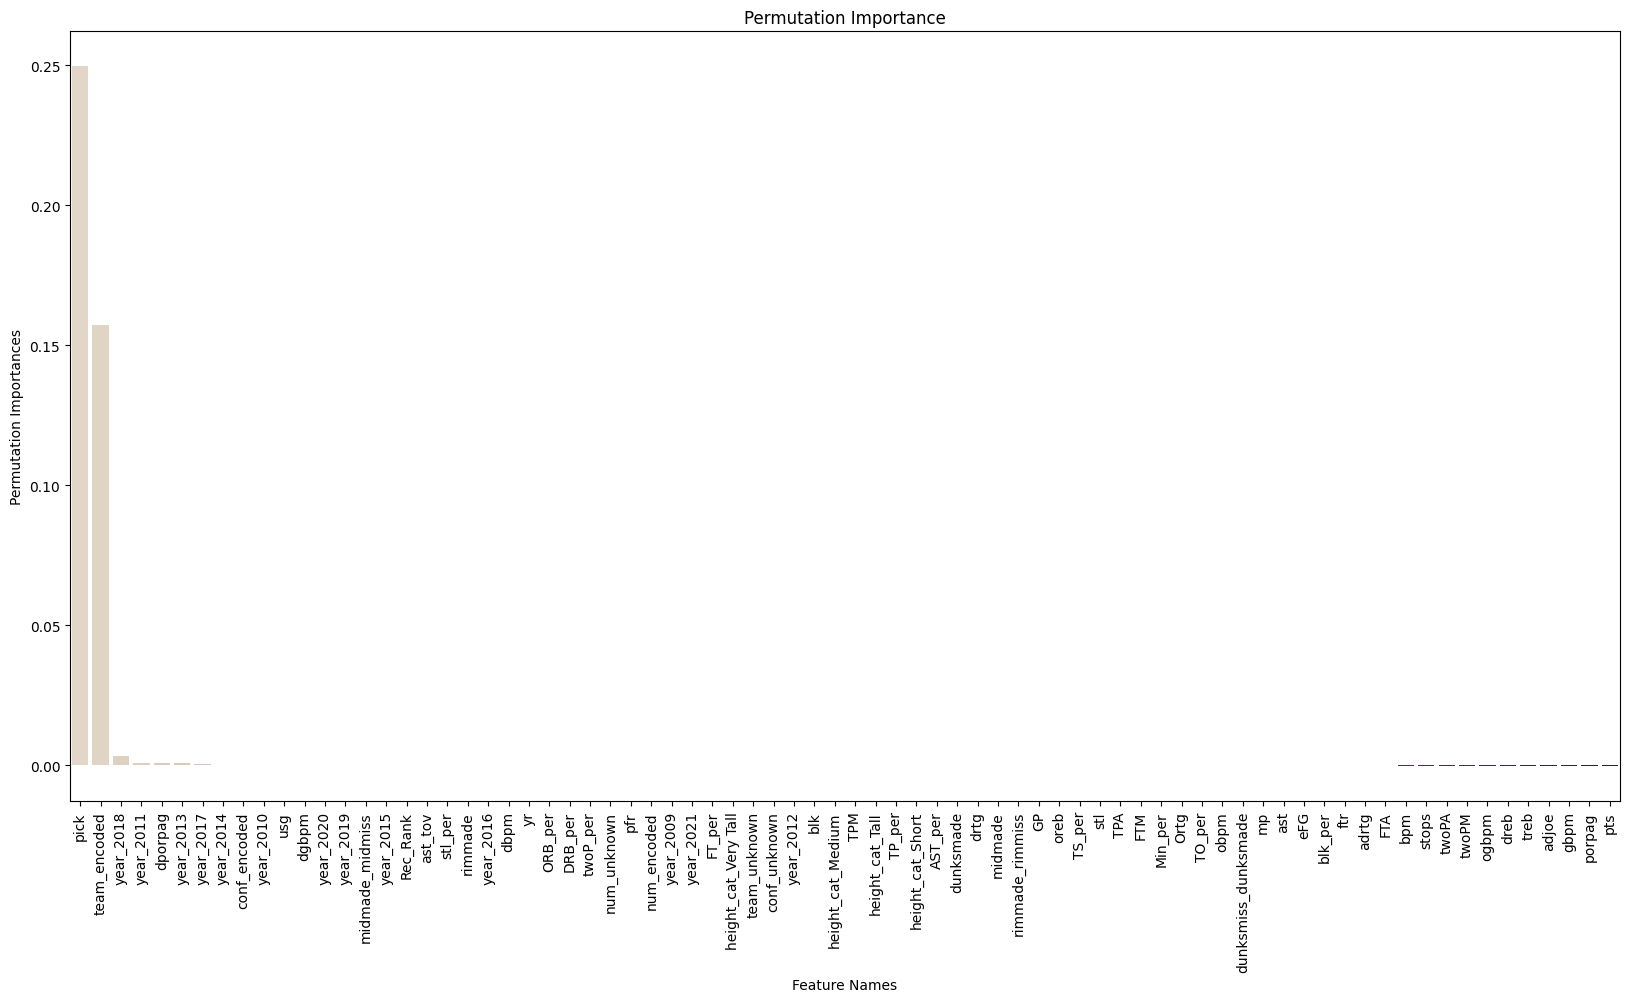

In [14]:
permutation_score = modeling.permutation_importance()

In [9]:
from joblib import dump

dump(random_forest, '../models/random_forest.joblib')

['../models/random_forest.joblib']

In [29]:
from visualization.submission_file import submission_file

In [30]:
y_test_probs = random_forest.predict_proba(X_test)[:, 1]

In [31]:
submission_2 = submission_file(y_test_probs)

In [18]:
submission_2.to_csv('../data/submission/submission_1_rf.csv', index=False)

#### Hyperparameter Tuning with n_estimators

default = 100

In [37]:
n_estimators = [2, 5, 10, 20, 50, 100, 150, 200, 250, 300]

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []
    
for i in n_estimators:
    rf = RandomForestClassifier(random_state=8, n_estimators=i).fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    y_val_preds = rf.predict(X_val)
    
    y_train_probs = rf.predict_proba(X_train)[:, 1]
    y_val_probs = rf.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))
    
results_n_estimators = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=n_estimators)
results_n_estimators

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
2,0.999676,0.998179,0.998302,0.993969,0.999416,0.996536,0.997187,0.991385,0.998300,0.993954
5,0.999999,0.999251,0.999569,0.996757,0.999164,0.994351,0.999975,0.999189,0.999569,0.996764
10,1.000000,0.999664,0.999937,0.996909,0.999873,0.994752,1.000000,0.999088,0.999937,0.996915
20,1.000000,0.999927,0.999987,0.996959,0.999975,0.994254,1.000000,0.999696,0.999987,0.996968
50,1.000000,0.999984,1.000000,0.997010,1.000000,0.994354,1.000000,0.999696,1.000000,0.997018
100,1.000000,0.999986,1.000000,0.997061,1.000000,0.994355,1.000000,0.999797,1.000000,0.997069
150,1.000000,0.999989,1.000000,0.997061,1.000000,0.994255,1.000000,0.999899,1.000000,0.997069
200,1.000000,0.999989,1.000000,0.997010,1.000000,0.994155,1.000000,0.999899,1.000000,0.997019
250,1.000000,0.999989,1.000000,0.997010,1.000000,0.994155,1.000000,0.999899,1.000000,0.997019
300,1.000000,0.999989,1.000000,0.997061,1.000000,0.994255,1.000000,0.999899,1.000000,0.997069


In [38]:
def plot_performance(parameter, xlabel):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))

    ax1.plot(parameter, val_accuracy, label='Validation Accuracy')
    ax1.plot(parameter, train_accuracy, label='Training Accuracy')
    ax1.legend()
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Accuracy Score')

    ax2.plot(parameter, val_precision, label='Validation Precision')
    ax2.plot(parameter, train_precision, label='Training Precision')
    ax2.legend()
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision Score')

    ax3.plot(parameter, val_recall, label='Validation Recall')
    ax3.plot(parameter, train_recall, label='Training Recall')
    ax3.legend()
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel('Recall')
    ax3.set_title('Recall Score')

    ax4.plot(parameter, val_f1_score, label='Validation F1-Score')
    ax4.plot(parameter, train_f1_score, label='Training F1-Score')
    ax4.legend()
    ax4.set_xlabel(xlabel)
    ax4.set_ylabel('F1-Score')
    ax4.set_title('F1-Score')
    
    plt.subplots_adjust(wspace=0.4)
    plt.show()

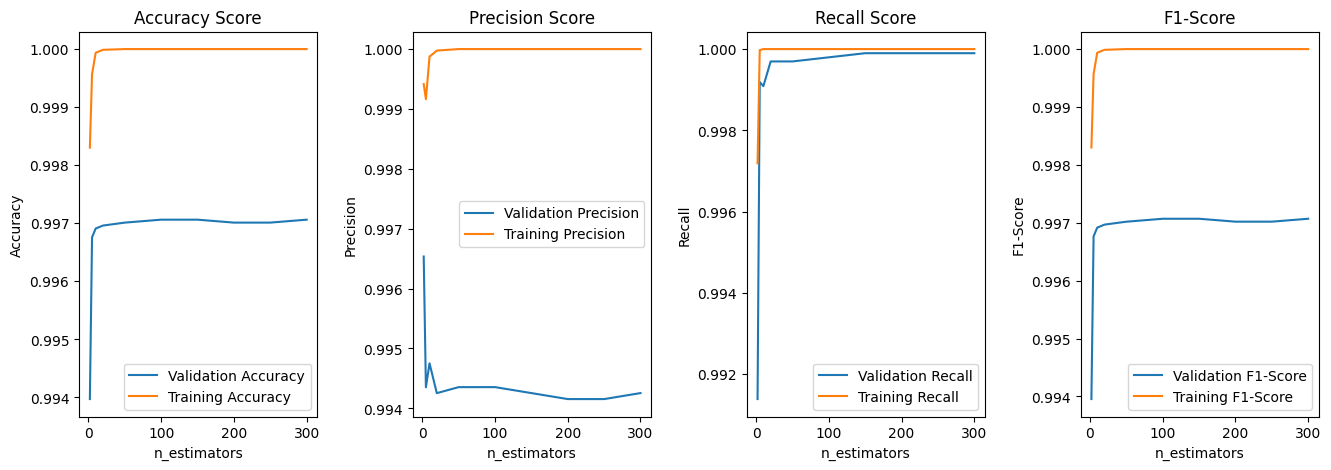

In [39]:
plot_performance(n_estimators, 'n_estimators')

#### Hyperparameter Tuning with Max Depth

default = None

In [40]:
max_depth = [2, 5, 10, 20, 50, 100, None]

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

n_estimators = 150
    
for i in max_depth:
    rf = RandomForestClassifier(random_state=8, n_estimators=n_estimators, max_depth=i).fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    y_val_preds = rf.predict(X_val)
    
    y_train_probs = rf.predict_proba(X_train)[:, 1]
    y_val_probs = rf.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))
    
results_max_depth = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=max_depth)
results_max_depth

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
2.0,0.995076,0.995204,0.961040,0.961889,0.942161,0.942170,0.982389,0.984188,0.961855,0.962721
5.0,0.998753,0.998555,0.985531,0.985911,0.972295,0.972968,0.999544,0.999595,0.985731,0.986101
10.0,0.999941,0.999769,0.996250,0.995794,0.992555,0.991657,1.000000,1.000000,0.996264,0.995811
20.0,1.000000,0.999978,0.998594,0.996757,0.997195,0.993555,1.000000,1.000000,0.998596,0.996767
50.0,1.000000,0.999989,1.000000,0.997061,1.000000,0.994255,1.000000,0.999899,1.000000,0.997069
100.0,1.000000,0.999989,1.000000,0.997061,1.000000,0.994255,1.000000,0.999899,1.000000,0.997069
NaN,1.000000,0.999989,1.000000,0.997061,1.000000,0.994255,1.000000,0.999899,1.000000,0.997069


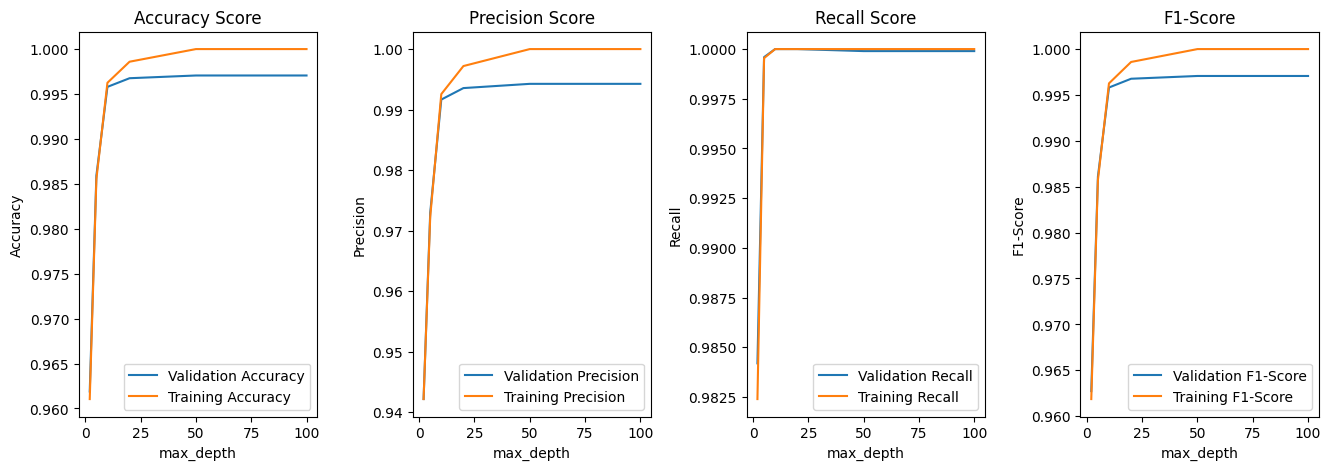

In [41]:
plot_performance(max_depth, 'max_depth')

#### Hyperparameter Tuning with Min Sample Split

default = 2

In [42]:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

n_estimators = 150
max_depth = 20
    
for i in min_samples_split:
    rf = RandomForestClassifier(random_state=8, n_estimators=n_estimators, max_depth=max_depth, min_samples_split=i).fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    y_val_preds = rf.predict(X_val)
    
    y_train_probs = rf.predict_proba(X_train)[:, 1]
    y_val_probs = rf.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))
    
results_min_samples_split = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=min_samples_split)
results_min_samples_split

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
2,1.000000,0.999978,0.998594,0.996757,0.997195,0.993555,1.0,1.0,0.998596,0.996767
5,0.999999,0.999980,0.998416,0.996655,0.996843,0.993355,1.0,1.0,0.998419,0.996666
10,0.999999,0.999976,0.998138,0.996706,0.996289,0.993455,1.0,1.0,0.998141,0.996717
15,0.999997,0.999969,0.998062,0.996655,0.996138,0.993355,1.0,1.0,0.998065,0.996666
20,0.999997,0.999962,0.997909,0.996605,0.995836,0.993255,1.0,1.0,0.997914,0.996616
50,0.999989,0.999934,0.997327,0.996250,0.994682,0.992555,1.0,1.0,0.997334,0.996264
100,0.999973,0.999884,0.997010,0.996250,0.994055,0.992555,1.0,1.0,0.997019,0.996264


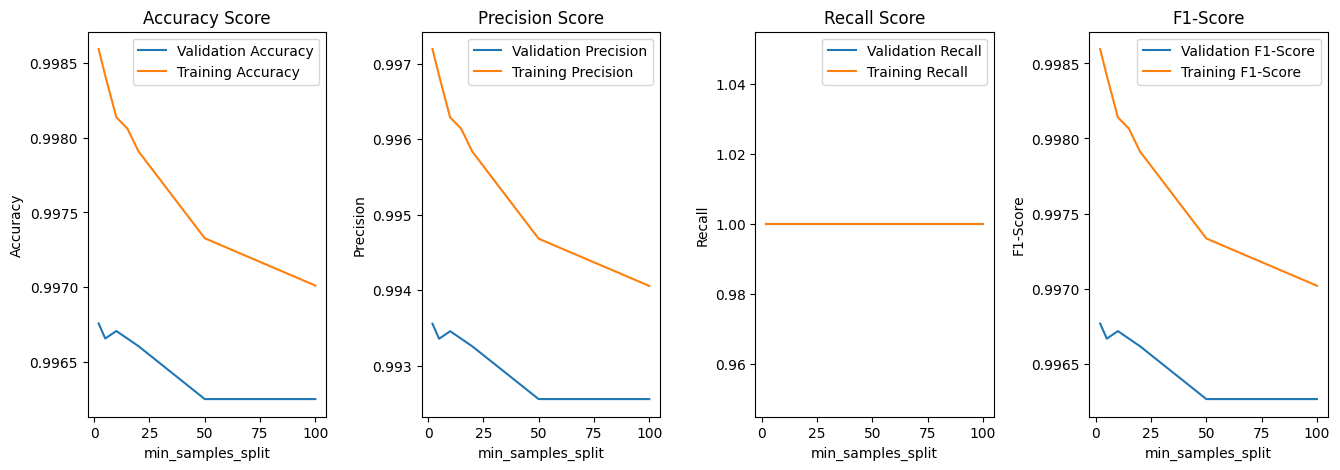

In [43]:
plot_performance(min_samples_split, 'min_samples_split')

#### Hyperparameter Tuning with Min Samples Leaf

default = 1

In [45]:
min_samples_leaf = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

n_estimators = 150
max_depth = 20
min_samples_split = 5
    
for i in min_samples_leaf:
    rf = RandomForestClassifier(random_state=8, n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=i).fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    y_val_preds = rf.predict(X_val)
    
    y_train_probs = rf.predict_proba(X_train)[:, 1]
    y_val_probs = rf.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))
    
results_min_samples_leaf = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=min_samples_leaf)
results_min_samples_leaf

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
1,0.999999,0.999980,0.998416,0.996655,0.996843,0.993355,1.0,1.0,0.998419,0.996666
2,0.999999,0.999981,0.998302,0.996757,0.996616,0.993555,1.0,1.0,0.998305,0.996767
5,0.999997,0.999969,0.997441,0.996655,0.994907,0.993355,1.0,1.0,0.997447,0.996666
10,0.999988,0.999934,0.996478,0.996047,0.993005,0.992156,1.0,1.0,0.996490,0.996063
15,0.999971,0.999876,0.996148,0.995540,0.992356,0.991159,1.0,1.0,0.996163,0.995560
20,0.999953,0.999854,0.995870,0.995540,0.991807,0.991159,1.0,1.0,0.995887,0.995560
25,0.999931,0.999814,0.995540,0.995439,0.991159,0.990960,1.0,1.0,0.995560,0.995460
30,0.999898,0.999762,0.995490,0.995185,0.991060,0.990463,1.0,1.0,0.995510,0.995209
35,0.999875,0.999741,0.995300,0.995084,0.990687,0.990264,1.0,1.0,0.995322,0.995108
40,0.999845,0.999677,0.995312,0.995135,0.990711,0.990363,1.0,1.0,0.995334,0.995158


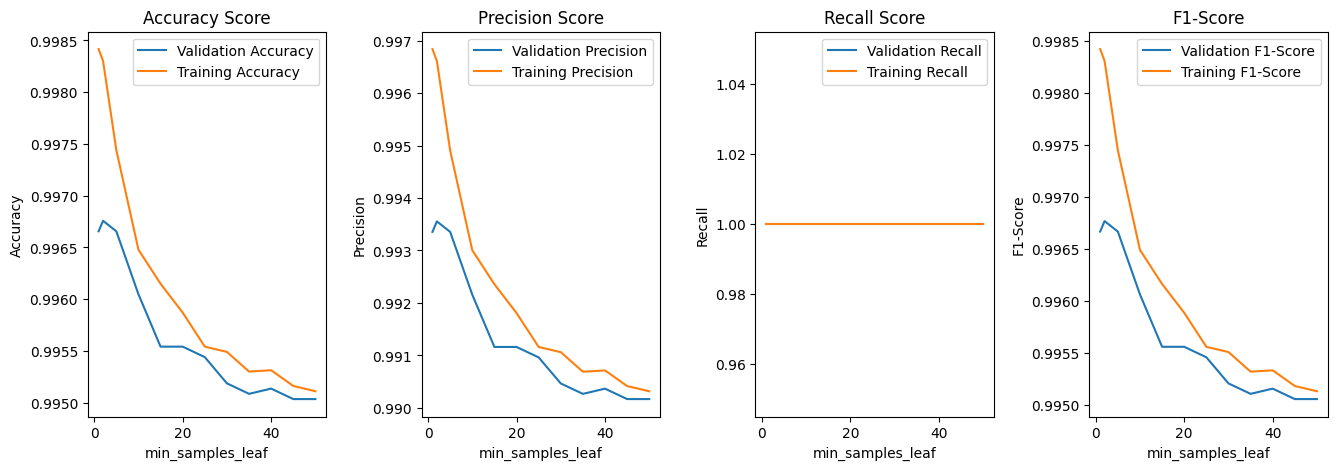

In [46]:
plot_performance(min_samples_leaf, 'min_samples_leaf')

#### Hyperparameter Tuning with Max Features

default = sqrt

In [47]:
max_features = ['sqrt', 'log2', None]

train_auc_score = []
val_auc_score = []
train_accuracy = []
val_accuracy = []
train_recall = []
val_recall = []
train_precision = []
val_precision = []
train_f1_score = []
val_f1_score = []

n_estimators = 150
max_depth = 20
min_samples_split = 5
min_samples_leaf = 2
    
for i in max_features:
    rf = RandomForestClassifier(random_state=8, n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=i).fit(X_train, y_train)
    y_train_preds = rf.predict(X_train)
    y_val_preds = rf.predict(X_val)
    
    y_train_probs = rf.predict_proba(X_train)[:, 1]
    y_val_probs = rf.predict_proba(X_val)[:, 1]

    train_accuracy.append(accuracy_score(y_train, y_train_preds))
    val_accuracy.append(accuracy_score(y_val, y_val_preds))

    train_recall.append(recall_score(y_train, y_train_preds))
    val_recall.append(recall_score(y_val, y_val_preds))

    train_precision.append(precision_score(y_train, y_train_preds))
    val_precision.append(precision_score(y_val, y_val_preds))

    train_f1_score.append(f1_score(y_train, y_train_preds))
    val_f1_score.append(f1_score(y_val, y_val_preds))
    
    train_auc_score.append(roc_auc_score(y_train, y_train_probs))
    val_auc_score.append(roc_auc_score(y_val, y_val_probs))
    
results_max_features = pd.DataFrame({'train_auc_score': train_auc_score,
                          'val_auc_score': val_auc_score,
                          'train_accuracy': train_accuracy,
                          'val_accuracy': val_accuracy,
                          'train_precision': train_precision,
                          'val_precision': val_precision,
                          'train_recall': train_recall,
                          'val_recall': val_recall,
                          'train_f1_score': train_f1_score,
                          'val_f1_score': val_f1_score}, index=max_features)
results_max_features

,train_auc_score,val_auc_score,train_accuracy,val_accuracy,train_precision,val_precision,train_recall,val_recall,train_f1_score,val_f1_score
sqrt,0.999999,0.999981,0.998302,0.996757,0.996616,0.993555,1.000000,1.000000,0.998305,0.996767
log2,0.999999,0.999980,0.998340,0.996807,0.996692,0.993655,1.000000,1.000000,0.998343,0.996817
None,0.999993,0.999952,0.998454,0.996706,0.996943,0.994052,0.999975,0.999392,0.998457,0.996715


In [49]:
max_features = ['sqrt', 'log2', 'None']

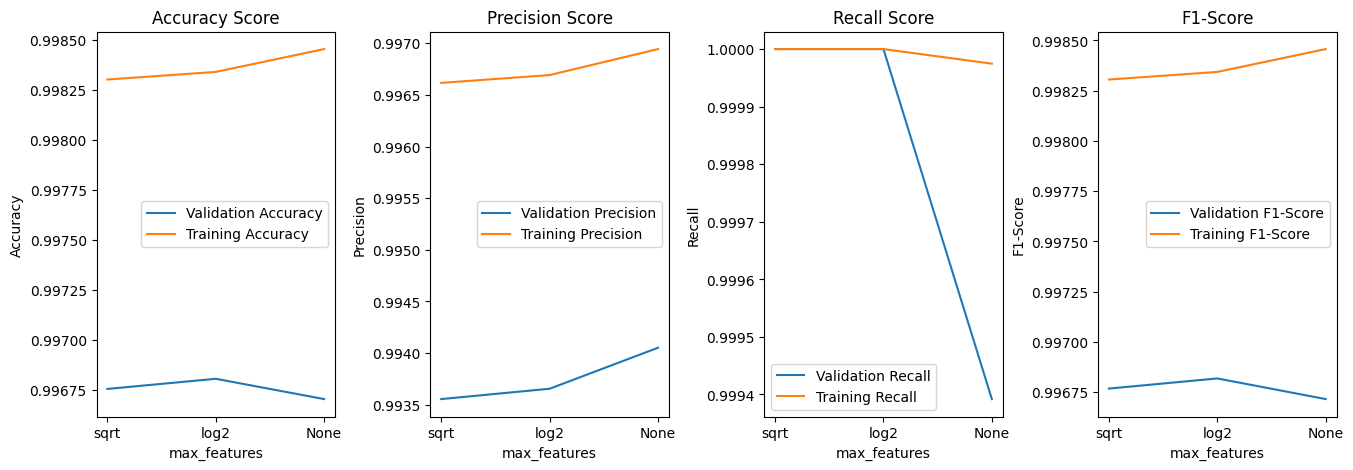

In [50]:
plot_performance(max_features, 'max_features')

### Model after hyperparameter tuning

In [51]:
rf_tune = RandomForestClassifier(random_state=8, n_estimators=n_estimators,  max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features='sqrt')
rf_tune.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=8)

In [52]:
modeling_tune = Modeling(rf_tune, X_train, X_val, y_train, y_val, X_test)

                roc-auc score  accuracy score  precision score  recall score   
Training Set         0.999999        0.998302         0.996616           1.0  \
Validation Set       0.999981        0.996757         0.993555           1.0   

                f1 score  
Training Set    0.998305  
Validation Set  0.996767  


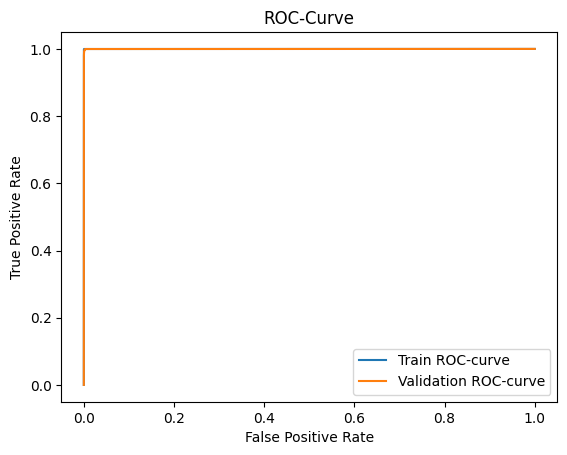

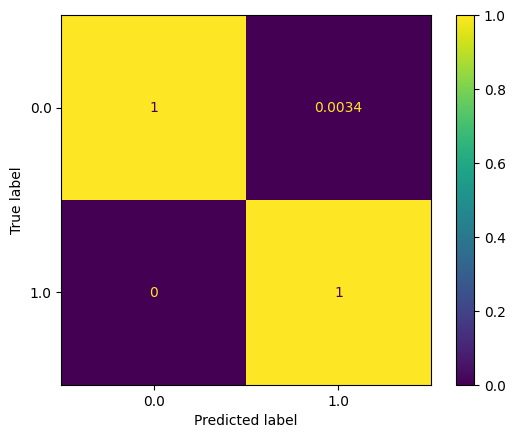

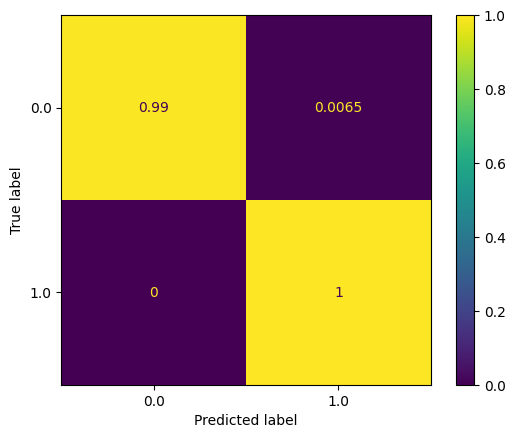

In [53]:
modeling_tune.predict_model()

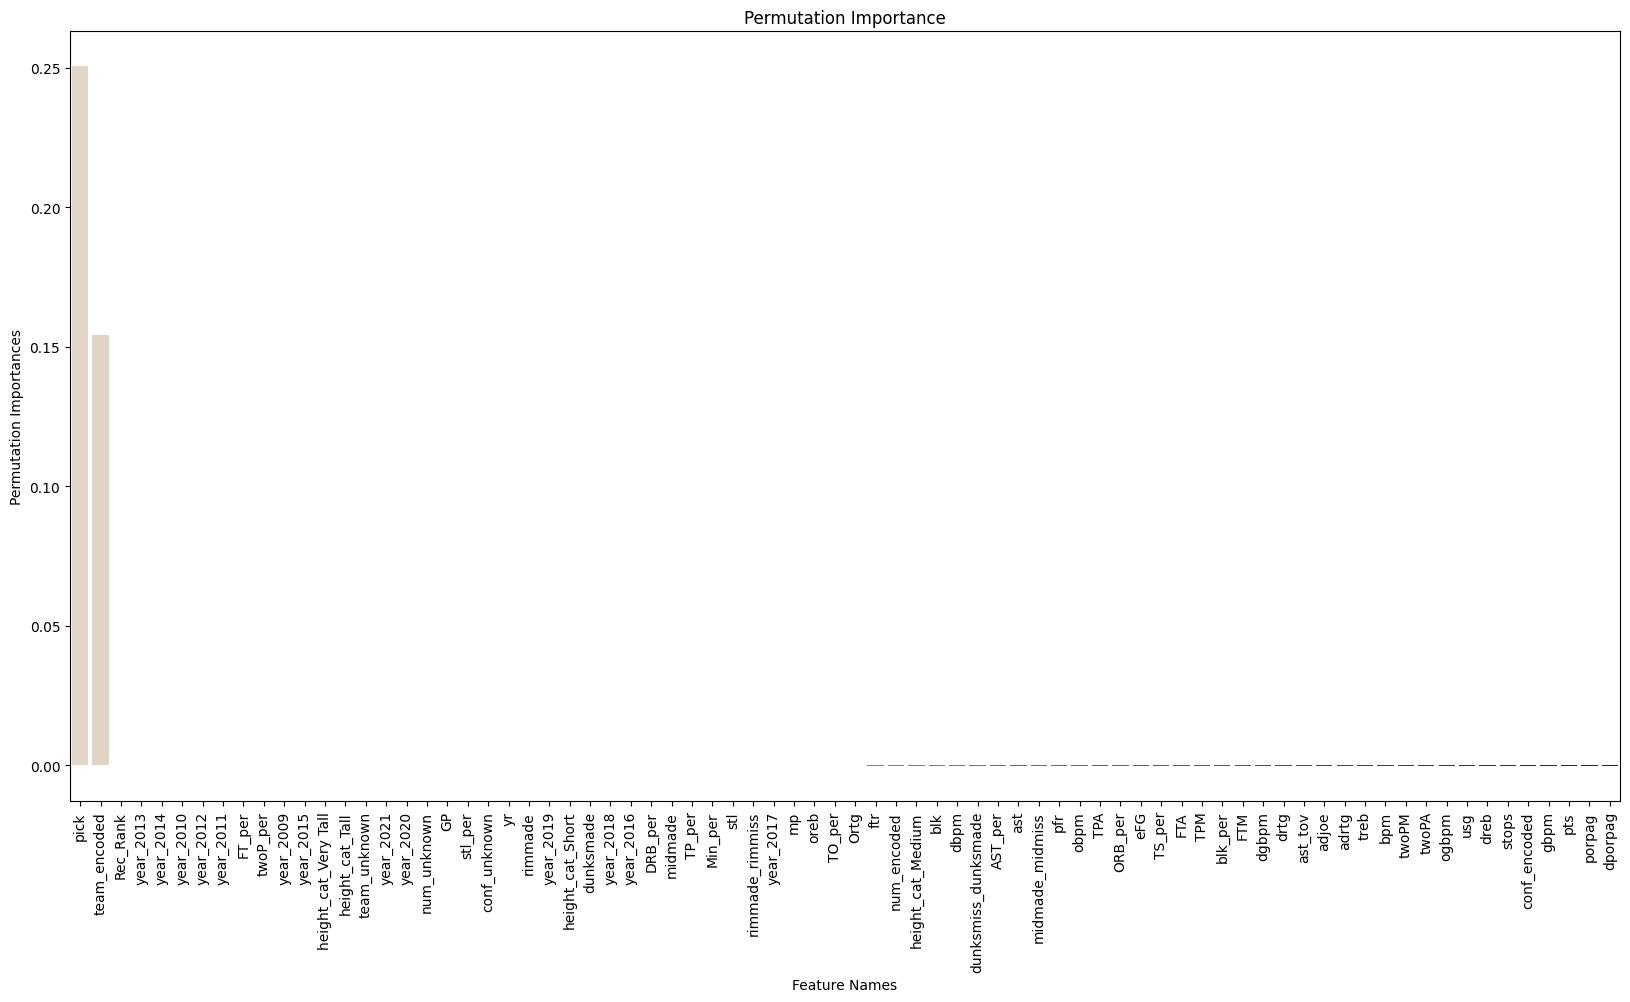

In [54]:
permutation_score_tune = modeling_tune.permutation_importance()

In [13]:
dump(rf_tune, '../models/rf_tune.joblib')

['../models/rf_tune.joblib']

In [55]:
y_test_probs_2 = rf_tune.predict_proba(X_test)[:, 1]

In [56]:
submission_2 = submission_file(y_test_probs_2)

In [58]:
submission_2.to_csv('../data/submission/submission_2_rf_tune.csv', index=False)